Assignment 2 - T2 2022 Demonstrative Example Number: Deep Learning Technique Name - Problem Name: RNN-female-male-eyes Dataset

## Executive Summary
Here, RNN model in python is used for binary classification. RNN stands for Recurrent Neural Network it is a class of artificial neural networks that uses sequential data or time-series data. It is mainly used for ordinal or temporal problems. In this project, Male and female eyes images are being classified. Developer is supposed to give path to images from their image dataset.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:/ABES/Dhanesh Project/PROJECT 3/RNN for/male _female_eyes_daatset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

D:/ABES/Dhanesh Project/PROJECT 3/RNN for/male _female_eyes_daatset\femaleeyes\1.jpg
D:/ABES/Dhanesh Project/PROJECT 3/RNN for/male _female_eyes_daatset\femaleeyes\10.jpg
D:/ABES/Dhanesh Project/PROJECT 3/RNN for/male _female_eyes_daatset\femaleeyes\100.jpg
D:/ABES/Dhanesh Project/PROJECT 3/RNN for/male _female_eyes_daatset\femaleeyes\1000.jpg
D:/ABES/Dhanesh Project/PROJECT 3/RNN for/male _female_eyes_daatset\femaleeyes\1001.jpg
D:/ABES/Dhanesh Project/PROJECT 3/RNN for/male _female_eyes_daatset\femaleeyes\1002.jpg
D:/ABES/Dhanesh Project/PROJECT 3/RNN for/male _female_eyes_daatset\femaleeyes\1005.jpg
D:/ABES/Dhanesh Project/PROJECT 3/RNN for/male _female_eyes_daatset\femaleeyes\1006.jpg
D:/ABES/Dhanesh Project/PROJECT 3/RNN for/male _female_eyes_daatset\femaleeyes\1007.jpg
D:/ABES/Dhanesh Project/PROJECT 3/RNN for/male _female_eyes_daatset\femaleeyes\1008.jpg
D:/ABES/Dhanesh Project/PROJECT 3/RNN for/male _female_eyes_daatset\femaleeyes\1009.jpg
D:/ABES/Dhanesh Project/PROJECT 3/RNN 

## 1. Data Description
People are being determined by their gender by eye. Inspiration of this code is Sex determination by eye.Found 11525 files belonging to 2 classes. Using 9220 files for training.Among 11525 files belonging to 2 classes, using 2305 files for validation.

In [ ]:
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

## 2. Data Preprocessing
Carry out necessary data preprocessing and exploration.

# **Loading Data**

In [ ]:
height = 75
width = 75

In [ ]:
PATH = "D:/ABES/Dhanesh Project/PROJECT 3/RNN for/male _female_eyes_daatset"
train_dir = os.path.join(PATH)
train = keras.preprocessing.image_dataset_from_directory(train_dir,validation_split=(0.2),subset="training",seed=42,image_size=(height,width))
validation = keras.preprocessing.image_dataset_from_directory(train_dir,validation_split=(0.2),subset="validation",seed=42,image_size=(height,width))

Found 11525 files belonging to 2 classes.
Using 9220 files for training.
Found 11525 files belonging to 2 classes.
Using 2305 files for validation.


# **Plotting Train Data**

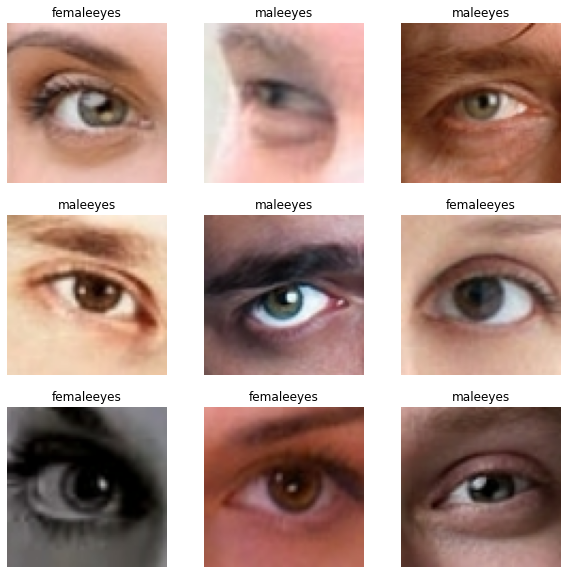

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train.class_names[labels[i]])
        plt.axis(False)

# **Creating RNN LSTM Model**

## 3. Model Construction


In [ ]:
scaler = keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1/255)])

In [ ]:
augmentation = keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
                                tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
                               tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")])

In [ ]:
input_shape=(75,75,3)

In [ ]:
def model_lstm(input_shape):
    
    inp = Input(shape=input_shape)
    model = inp
    
#     if input_shape[0] > 2: model = Conv1D(filters=24, kernel_size=(3), activation='relu')(model)
    if input_shape[0] > 0: model = TimeDistributed(Conv1D(filters=24, kernel_size=3, activation='relu'))(model)
    model = LSTM(16)(model)
    model = Activation('relu')(model)
    model = Dropout(0.2)(model)
    model = Dense(16)(model)
    model = Activation('relu')(model)
    model = BatchNormalization()(model)

    model = Dense(1)(model)
    model = Activation('sigmoid')(model)
    
    model = Model(inp, model)
    return model

In [ ]:
model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer="adam")
early_stop = keras.callbacks.EarlyStopping(patience=3)

## 4. Model Execution
code to fit the models.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 75, 75, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 73, 73, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 32)        4640      
_________________________________________________________________
batch_normalization (BatchNo (None, 71, 71, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 71, 71, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 35, 35, 32)       

In [ ]:
history = model.fit(train,validation_data=validation,epochs=12,callbacks=early_stop)

Epoch 1/2
289/289 [==============================] - 64s 221ms/step - loss: 0.3074 - accuracy: 0.8697 - val_loss: 0.2673 - val_accuracy: 0.8885
Epoch 2/2
289/289 [==============================] - 64s 220ms/step - loss: 0.2779 - accuracy: 0.8817 - val_loss: 0.2615 - val_accuracy: 0.8876


# **Evaluating Model Performance**

## 5. Experiments Report
As far as neural network models are concerned, it is common to examine learning curve graphs to decide on model convergence. Generally, accuracy and epoch plot loss (or error) vs. epoch or accuracy vs. epoch graphs are demonstrated. During this dataset training, developer expect the loss to decrease and accuracy to increase as the number of epochs increases.

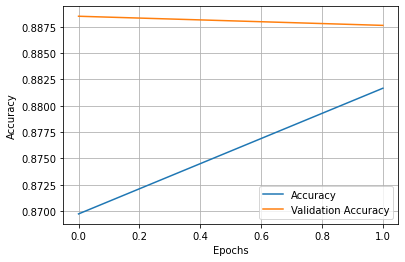

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.accuracy,label="Accuracy")
plt.plot(history_df.val_accuracy,label="Validation Accuracy")
plt.xlabel("Epochs"),
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

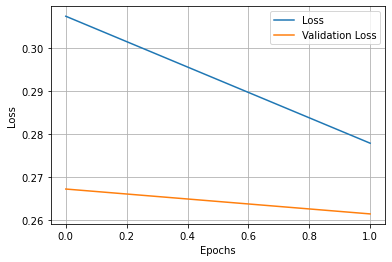

In [ ]:
plt.plot(history_df.loss,label="Loss")
plt.plot(history_df.val_loss,label="Validation Loss")
plt.xlabel("Epochs"),
plt.ylabel("Loss")
plt.legend()
plt.grid()

# **Making Predictions**

In [ ]:
prediction = model.predict(validation)

In [ ]:
prediction_labels = []
for i in prediction:
    if i >0.5:
        prediction_labels.append(1)
    else:
        prediction_labels.append(0)

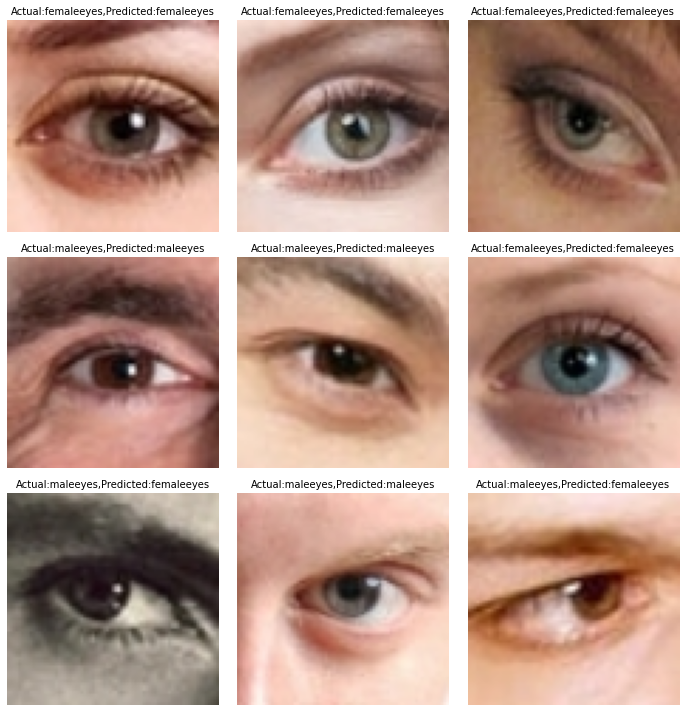

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in validation.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Actual:{validation.class_names[labels[i]]},Predicted:{validation.class_names[prediction_labels[i]]}",fontsize=10)
        plt.axis(False)
        plt.tight_layout()
